In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [20]:
df = pd.read_csv('..//database//Temporal-Series//dataset.csv')

In [21]:
df.head(4)

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [23]:
df['Data'] = pd.to_datetime(df['Data'])

In [24]:
df['Data'].min()

Timestamp('2023-01-01 00:00:00')

In [25]:
df['Data'].max()

Timestamp('2023-12-31 00:00:00')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [27]:
temporal_series = df.set_index('Data')['Total_Vendas']

In [28]:
temporal_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [29]:
type(temporal_series)

pandas.core.series.Series

In [30]:
temporal_series = temporal_series.asfreq('D')

In [31]:
temporal_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

[]

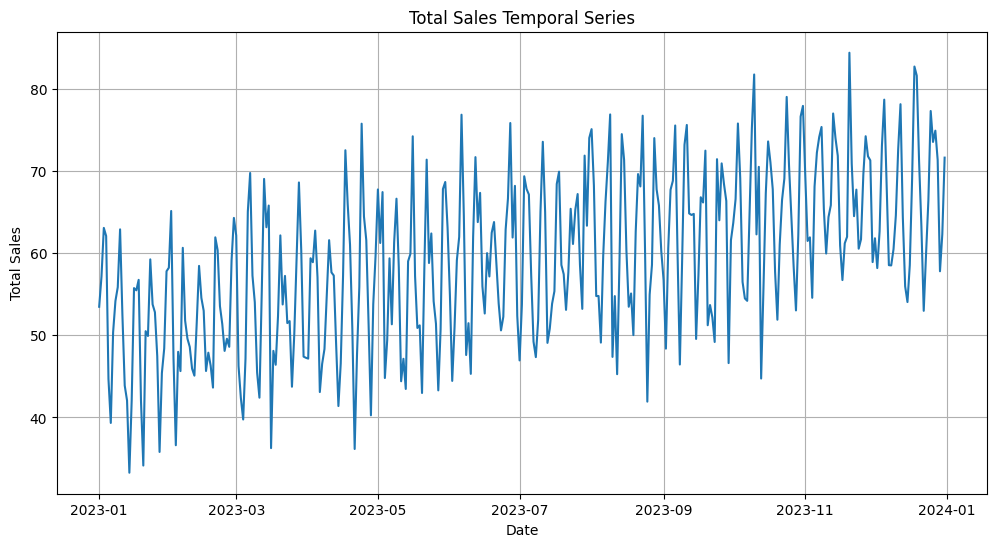

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(temporal_series, linewidth=1.5)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales Temporal Series')
plt.grid(True)
plt.plot()

## Exponential Smoothing

Exponential smoothing is a time series analysis and forecasting technique that applies weighted averages to historical data, where the weights decrease exponentially as the data gets older. Exponential smoothing is useful for dealing with trends and seasonality in data, and for reducing noise.

### Exponential Smoothing Assumptions

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

In Statsmodels, the SimpleExpSmoothing class is an implementation of the simple exponential smoothing technique, which is a more basic version of exponential smoothing that does not explicitly deal with trends and seasonality.

The Statsmodels SimpleExpSmoothing model, also known as simple exponential smoothing or exponentially weighted moving average, is a time series smoothing technique that assigns exponentially decreasing weights to past data points. It is mainly used to smooth time series and make short-term forecasts. The main assumptions of the SimpleExpSmoothing model are as follows:

- The time series is composed of a level component (average) and a random error component (noise). There are no trend or seasonality components in the series.


- The level component is a weighted average of past values, with weights that decrease exponentially as the data gets further into the past.


- The random error component is normally distributed with zero mean and constant variance. Furthermore, the errors are independent and identically distributed.


- The smoothing parameter (alpha) is a constant between 0 and 1, which determines the decay rate of the weights. Values close to 1 give more weight to more recent data, while values close to 0 give more weight to older data.

The SimpleExpSmoothing model is a very simple smoothing technique that has its limitations. It is best suited for time series that do not show clear trends or seasonality and for making short-term forecasts. For time series with trend and/or seasonality components, more advanced models such as Holt-Winters ExponentialSmoothing or SARIMA models may be more appropriate.

In [54]:
# Create the model

model = SimpleExpSmoothing(temporal_series)

In [55]:
# This line makes a call to the fit() method to fit the exponential smoothing model to the data. The argument smoothing_level=0.2 sets the smoothing parameter (alpha) to 0.2. The smoothing parameter controls how quickly the weights decrease over time; a larger value gives more weight to newer data, while a smaller value gives more weight to older data. The alpha value must be between 0 and 1.
adjusted_model = model.fit(smoothing_level = 0.2)

c:\Users\arthur.oliveira.PTCM-6597\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [57]:
# Esta linha acima extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão.

# O resultado final é uma nova série temporal chamada suavizacao_exponencial, que representa a versão suavizada da série original de vendas, com menos ruído e flutuações de curto prazo.

exp_smoothened = adjusted_model.fittedvalues

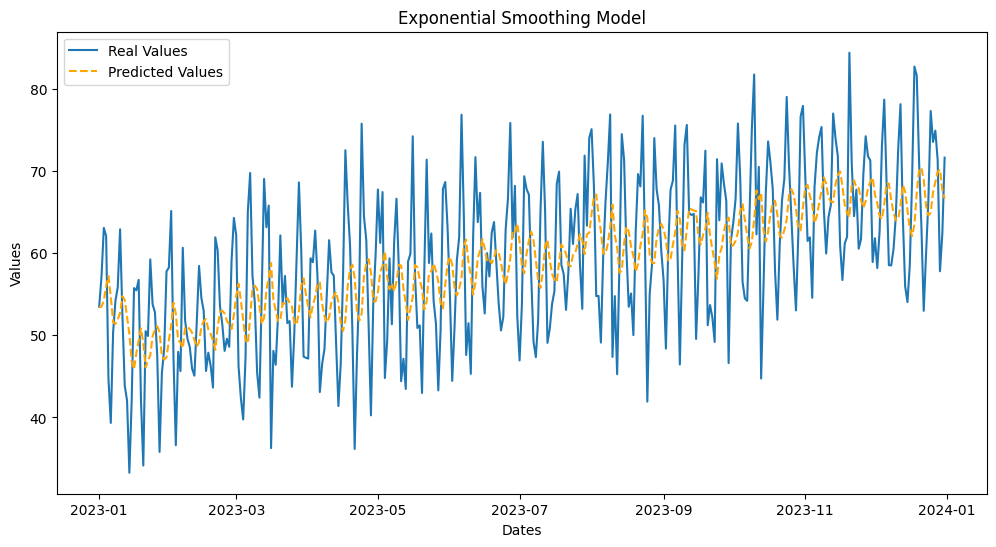

In [65]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(temporal_series, label='Real Values')
ax.plot(exp_smoothened, label = 'Predicted Values', color='orange', linestyle='--')
ax.set_xlabel('Dates')
ax.set_ylabel('Values')
ax.set_title('Exponential Smoothing Model')
plt.legend()
plt.show()

In [73]:
prediction_num = 1
predict = adjusted_model.forecast(steps = 100)

In [78]:
predict

2024-01-01    67.649892
2024-01-02    67.649892
2024-01-03    67.649892
2024-01-04    67.649892
2024-01-05    67.649892
                ...    
2024-04-05    67.649892
2024-04-06    67.649892
2024-04-07    67.649892
2024-04-08    67.649892
2024-04-09    67.649892
Freq: D, Length: 100, dtype: float64

In [76]:
predict.iloc[0]

67.64989180925505

## Example 2

In [95]:
# Create a date range
date_range = pd.date_range(start='1/1/2020', end='31/12/2020')

# Create some data
data = pd.Series([i**2 for i in range(len(date_range))], index=date_range)

# Fit the model
model = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)

# Make prediction
prediction = model.predict(start=len(data), end=len(data))

print('The predicted value is:', prediction)


The predicted value is: 2021-01-01    130341.0
Freq: D, dtype: float64


In [96]:
fitted_values = model.fittedvalues

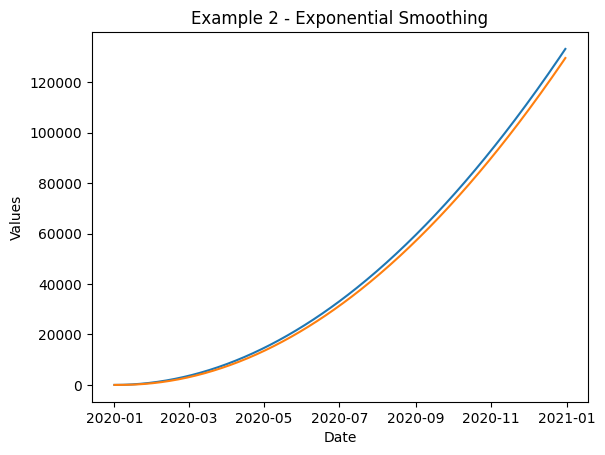

In [97]:
plt.plot(data)
plt.plot(fitted_values)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Example 2 - Exponential Smoothing')
plt.show()

In [98]:
ex2_predict = model.forecast(steps = 1)
ex2_predict

2021-01-01    130341.0
Freq: D, dtype: float64

In [100]:
# Create a date range
date_range = pd.date_range(start='1/1/2020', end='1/1/2021')

# Create some data
data = pd.Series([i**2 for i in range(len(date_range))], index=date_range)

# Fit the model
model = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)

# Make prediction
prediction = model.predict(start=len(data), end=len(data)+30)

print('The predicted value is:', prediction)

The predicted value is: 2021-01-02    131064.0
2021-01-03    131064.0
2021-01-04    131064.0
2021-01-05    131064.0
2021-01-06    131064.0
2021-01-07    131064.0
2021-01-08    131064.0
2021-01-09    131064.0
2021-01-10    131064.0
2021-01-11    131064.0
2021-01-12    131064.0
2021-01-13    131064.0
2021-01-14    131064.0
2021-01-15    131064.0
2021-01-16    131064.0
2021-01-17    131064.0
2021-01-18    131064.0
2021-01-19    131064.0
2021-01-20    131064.0
2021-01-21    131064.0
2021-01-22    131064.0
2021-01-23    131064.0
2021-01-24    131064.0
2021-01-25    131064.0
2021-01-26    131064.0
2021-01-27    131064.0
2021-01-28    131064.0
2021-01-29    131064.0
2021-01-30    131064.0
2021-01-31    131064.0
2021-02-01    131064.0
Freq: D, dtype: float64


## Testing another model

In [115]:
from statsmodels.tsa.api import Holt

# Fit the model
model = Holt(data).fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)

# Make prediction
prediction = model.predict(start=len(data), end=len(data)+30)


In [116]:
len(data)

367

In [ ]:
prediction

In [123]:
train = data[:int(0.8*len(data))]
valid = data[int(0.8*len(data)):]

In [127]:
# Model comparison

from sklearn.metrics import mean_squared_error
from math import sqrt

# Fit the models on the training data
model1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=False)
model2 = Holt(train).fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)

# Make predictions on the validation set
pred1 = model1.predict(start=len(train), end=len(train)+len(valid)-1)
pred2 = model2.predict(start=len(train), end=len(train)+len(valid)-1)

# Calculate RMSE
rmse1 = sqrt(mean_squared_error(valid, pred1))
rmse2 = sqrt(mean_squared_error(valid, pred2))

print('RMSE for Model 1:', rmse1)
print('RMSE for Model 2:', rmse2)

RMSE for Model 1: 29623.656973776877
RMSE for Model 2: 3353.638322777187
